Name: Sree Swiya Yarlagadda

Github: https://github.com/swiyasree

USC ID: 4295-5564-10

In [51]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, classification_report

(a) Download the Vertebral Column Data Set from: https://archive.ics.uci.edu/ml/datasets/Vertebral+Column.

In [52]:
data = arff.loadarff('vertebral_column_data/column_2C_weka.arff')[0]
data=pd.DataFrame(data)
print(data["class"].dtype)

object


In [53]:
data["class"]=data["class"].str.decode("utf-8", errors="ignore")
print(data)

     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0           63.027817    22.552586              39.609117     40.475232   
1           39.056951    10.060991              25.015378     28.995960   
2           68.832021    22.218482              50.092194     46.613539   
3           69.297008    24.652878              44.311238     44.644130   
4           49.712859     9.652075              28.317406     40.060784   
..                ...          ...                    ...           ...   
305         47.903565    13.616688              36.000000     34.286877   
306         53.936748    20.721496              29.220534     33.215251   
307         61.446597    22.694968              46.170347     38.751628   
308         45.252792     8.693157              41.583126     36.559635   
309         33.841641     5.073991              36.641233     28.767649   

     pelvic_radius  degree_spondylolisthesis     class  
0        98.672917                 -0.2544

In [54]:
class_mapping = {'Normal': 0, 'Abnormal': 1}
data['class'] = data['class'].map(class_mapping)
print(data)

     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0           63.027817    22.552586              39.609117     40.475232   
1           39.056951    10.060991              25.015378     28.995960   
2           68.832021    22.218482              50.092194     46.613539   
3           69.297008    24.652878              44.311238     44.644130   
4           49.712859     9.652075              28.317406     40.060784   
..                ...          ...                    ...           ...   
305         47.903565    13.616688              36.000000     34.286877   
306         53.936748    20.721496              29.220534     33.215251   
307         61.446597    22.694968              46.170347     38.751628   
308         45.252792     8.693157              41.583126     36.559635   
309         33.841641     5.073991              36.641233     28.767649   

     pelvic_radius  degree_spondylolisthesis  class  
0        98.672917                 -0.254400 

(b)iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [55]:
first_70_set = data[data["class"] == 0].iloc[:70]
after_70_set = data[data["class"] == 0].iloc[70:]
first_140_set = data[data["class"] == 1].iloc[:140]
after_140_set = data[data["class"] == 1].iloc[140:]

In [56]:
training_set = pd.concat([first_70_set,first_140_set])
print(training_set)

     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
210         38.505273    16.964297              35.112814     21.540976   
211         54.920858    18.968430              51.601455     35.952428   
212         44.362490     8.945435              46.902096     35.417055   
213         48.318931    17.452121              48.000000     30.866809   
214         45.701789    10.659859              42.577846     35.041929   
..                ...          ...                    ...           ...   
135         77.121344    30.349874              77.481083     46.771470   
136         88.024499    39.844669              81.774473     48.179830   
137         83.396606    34.310989              78.423293     49.085617   
138         72.054034    24.700737              79.874016     47.353297   
139         85.095503    21.069897              91.734792     64.025606   

     pelvic_radius  degree_spondylolisthesis  class  
210     127.632875                  7.986683 

In [57]:
testing_set = pd.concat([after_70_set,after_140_set])
print(testing_set)

     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
280         50.086153    13.430044              34.457541     36.656108   
281         64.261507    14.497866              43.902504     49.763642   
282         53.683380    13.447022              41.584297     40.236358   
283         48.995958    13.113820              51.873520     35.882137   
284         59.167612    14.562749              43.199158     44.604863   
..                ...          ...                    ...           ...   
205         80.111572    33.942432              85.101608     46.169139   
206         95.480229    46.550053              59.000000     48.930176   
207         74.094731    18.823727              76.032156     55.271004   
208         87.679087    20.365613              93.822416     67.313473   
209         48.259920    16.417462              36.329137     31.842457   

     pelvic_radius  degree_spondylolisthesis  class  
280     119.134622                  3.089484 

(b) Pre-Processing and Exploratory data analysis:
i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

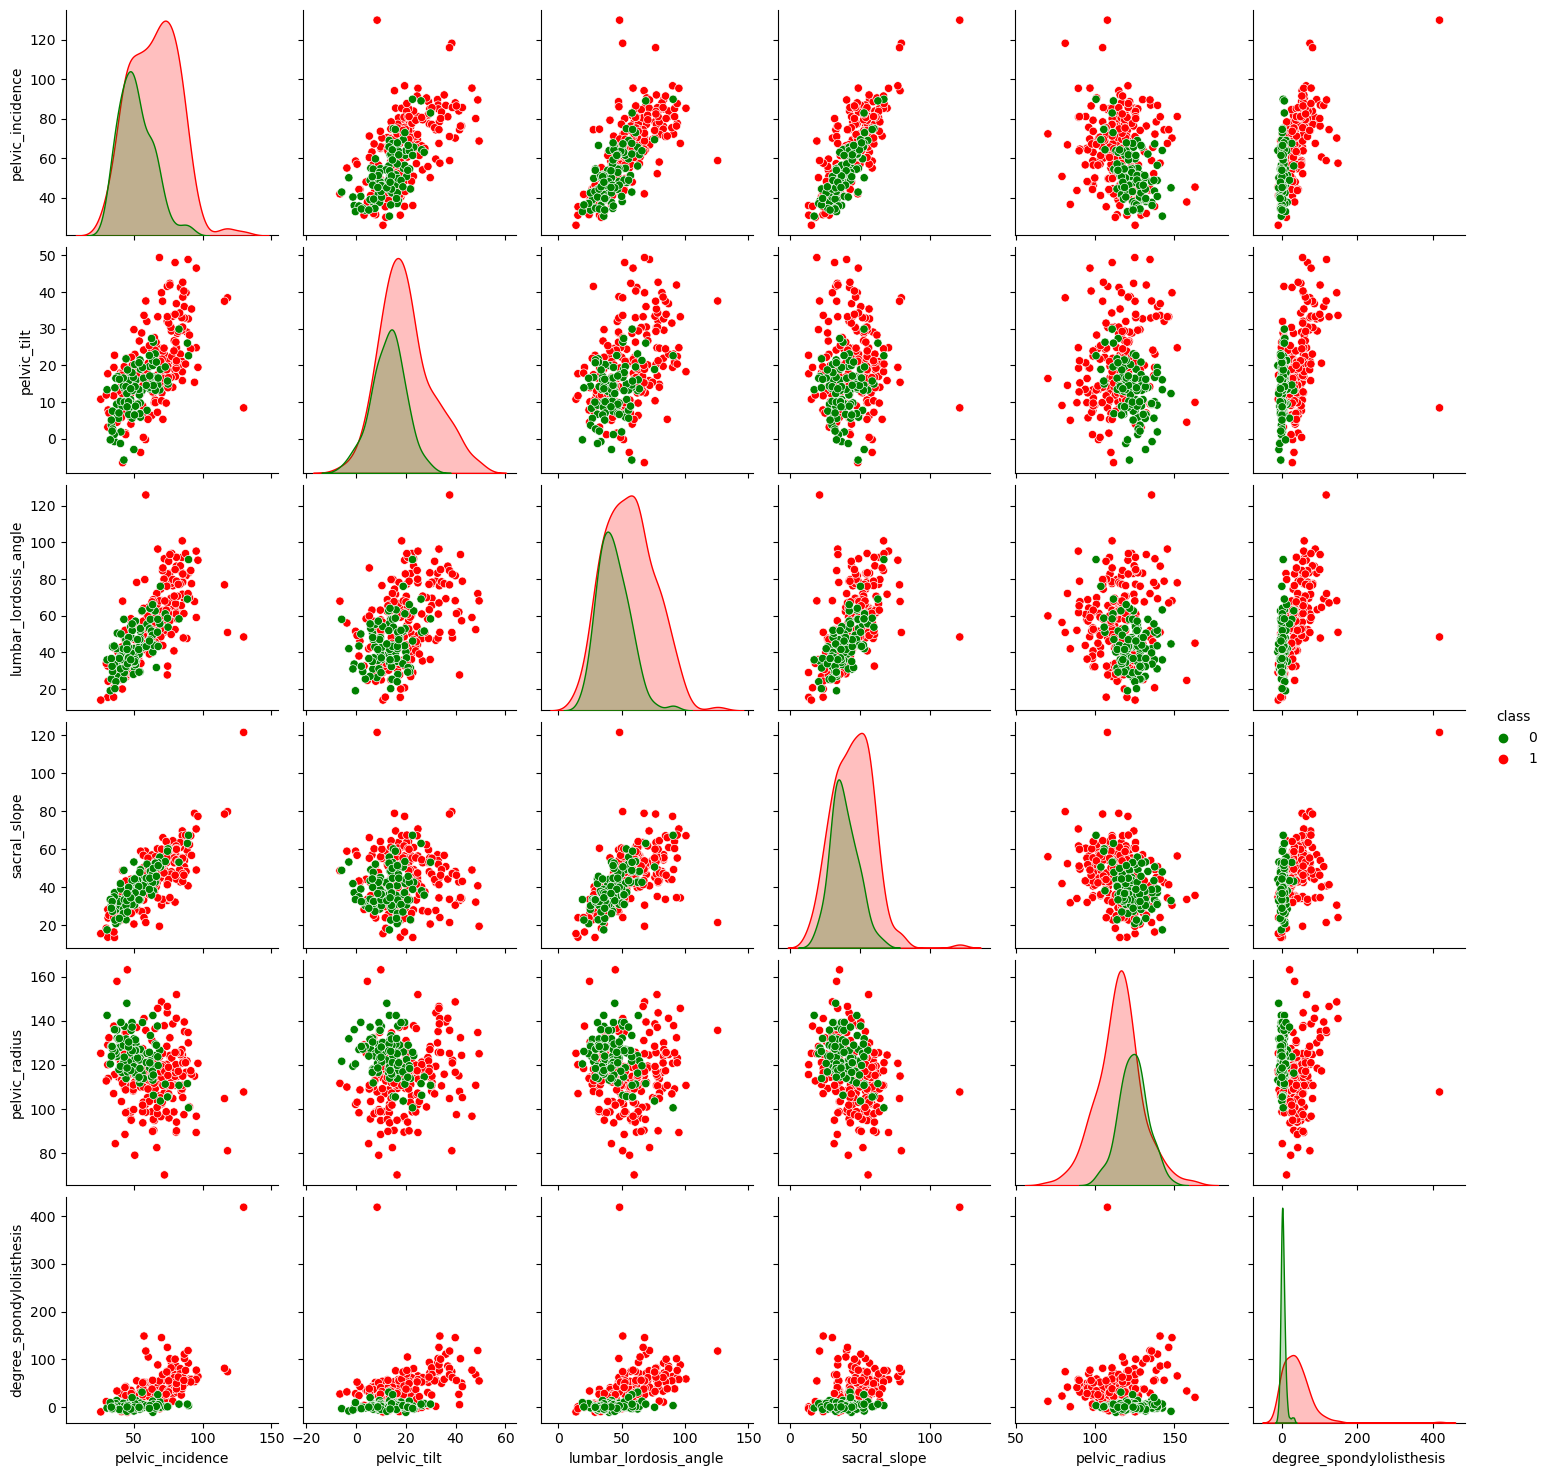

In [58]:
sns.pairplot(data, kind='scatter', hue='class', palette={0: 'green', 1: 'red'})

(b)ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1.

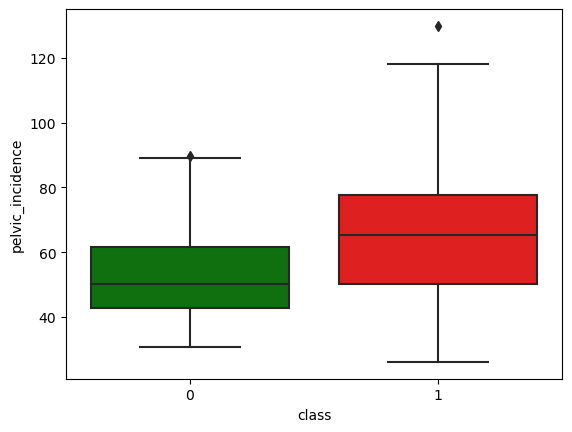

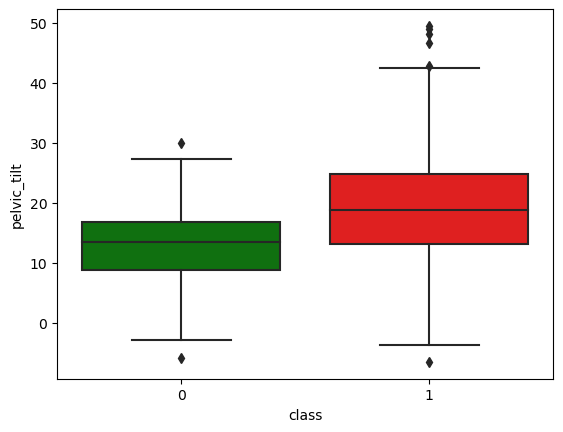

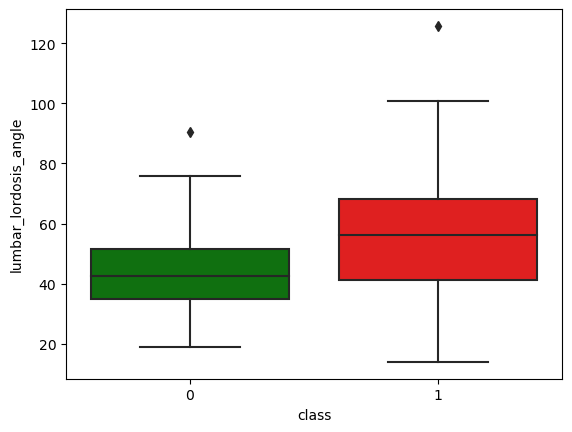

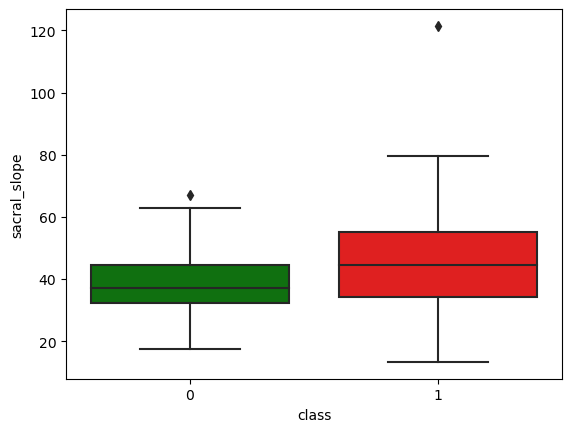

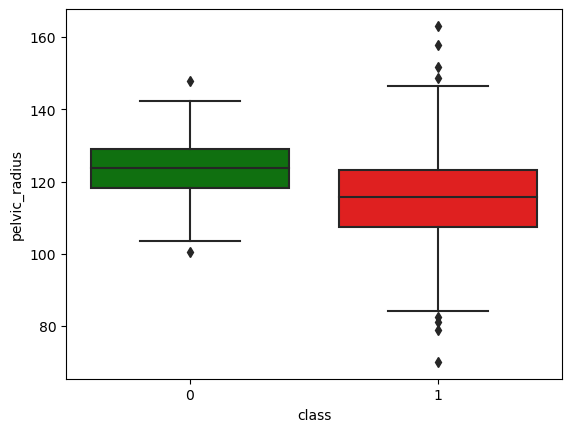

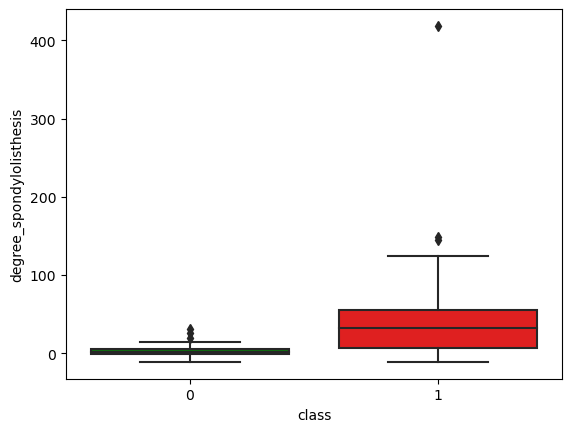

In [59]:
for column in data.columns[:-1]:
    sns.boxplot(x='class', y=column, data=data, palette={0: 'green', 1: 'red'})
    plt.show()

In [60]:
X=training_set.iloc[:,:6]
Y=training_set.iloc[:,6:]
print(X,Y)
print()
test_X=testing_set.iloc[:,:6]
test_Y=testing_set.iloc[:,6:]
print(test_X,test_Y)

     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
210         38.505273    16.964297              35.112814     21.540976   
211         54.920858    18.968430              51.601455     35.952428   
212         44.362490     8.945435              46.902096     35.417055   
213         48.318931    17.452121              48.000000     30.866809   
214         45.701789    10.659859              42.577846     35.041929   
..                ...          ...                    ...           ...   
135         77.121344    30.349874              77.481083     46.771470   
136         88.024499    39.844669              81.774473     48.179830   
137         83.396606    34.310989              78.423293     49.085617   
138         72.054034    24.700737              79.874016     47.353297   
139         85.095503    21.069897              91.734792     64.025606   

     pelvic_radius  degree_spondylolisthesis  
210     127.632875                  7.986683  
211  

(c) Classification using KNN on Vertebral Column Data Set
i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [61]:
clf=neighbors.KNeighborsClassifier()
clf.fit(X,Y["class"])
clf.score(test_X,test_Y)

0.9

ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. 
Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). 
You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? 
Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k∗.2

In [62]:
training_errors=[]
testing_errors=[]
minimum_error=1
k_optimal=None

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_X_scaled = scaler.transform(test_X)

for k in range(208, 0, -3):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    clf.fit(X_scaled, Y)
    Y_pred = clf.predict(test_X_scaled)
    y_pred = clf.predict(X_scaled)

    training_errors.append(np.mean(y_pred != Y['class']))
    new_test_error = np.mean(Y_pred != test_Y['class'])

    if new_test_error < minimum_error:
        minimum_error = new_test_error
        k_optimal = k

    testing_errors.append(new_test_error)

print("train",training_errors)
print()
print("test",testing_errors)
print()
print("k*=k=",k_optimal)

train [0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.319047619047619, 0.3, 0.24761904761904763, 0.23333333333333334, 0.23333333333333334, 0.23809523809523808, 0.21904761904761905, 0.22380952380952382, 0.21428571428571427, 0.21904761904761905, 0.20476190476190476, 0.21904761904761905, 0.19047619047619047, 0.19523809523809524, 0.19047619047619047, 0.18571428571428572, 0.19047619047619047, 0.18571428571428572, 0.18095238095238095, 0.1761904761904762, 0.18571428571428572, 0.18571428571428572, 0.19047619047619047, 0.1952380

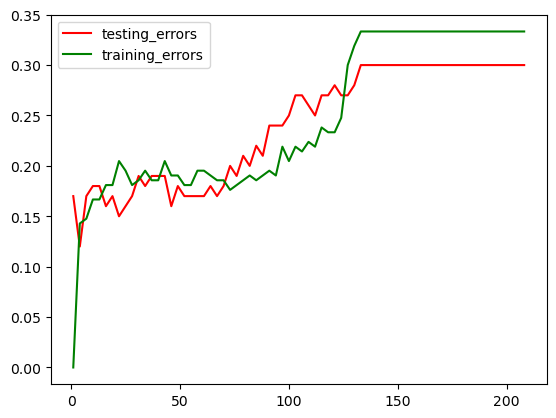

In [63]:
k_values = np.arange(start=208, stop=0, step=-3)

plt.plot(k_values, testing_errors, label="testing_errors", color='red')
plt.plot(k_values, training_errors, label="training_errors", color='green')

plt.legend()

In [64]:
clf=neighbors.KNeighborsClassifier(n_neighbors=4,metric="euclidean")
clf.fit(X,Y)
pred_Y=clf.predict(test_X)
print(metrics.classification_report(test_Y,pred_Y))

cmatrix = confusion_matrix(test_Y,pred_Y)
print("Confusion Matrix: ")
print(cmatrix)
print()

true_positive_rate = cmatrix[1][1]
false_positive_rate = cmatrix[0][1]
true_negative_rate = cmatrix[0][0]
false_negative_rate = cmatrix[1][0]

print("True positive rate: ", (true_positive_rate/(true_positive_rate + false_negative_rate)))
print()

print("True negative rate: ", (true_negative_rate/(true_negative_rate + false_positive_rate)))
print()

print("Precision: ",(true_positive_rate)/(true_positive_rate+false_positive_rate))
print()

print("F1-score: ", f1_score(test_Y,pred_Y))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100

Confusion Matrix: 
[[25  5]
 [ 1 69]]

True positive rate:  0.9857142857142858

True negative rate:  0.8333333333333334

Precision:  0.9324324324324325

F1-score:  0.9583333333333333


In [65]:
clf=neighbors.KNeighborsClassifier(n_neighbors=4,metric="manhattan")
clf.fit(X,Y)
pred_Y=clf.predict(test_X)
print(metrics.classification_report(test_Y,pred_Y))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        30
           1       0.89      0.97      0.93        70

    accuracy                           0.90       100
   macro avg       0.91      0.85      0.87       100
weighted avg       0.90      0.90      0.90       100



iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate,3 which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10,20,30,...,210}.4 Note: for each N, select your training set by choosing the first ⌊N/3⌋ rows of Class 0 and the first N − ⌊N/3⌋ rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1,6,11,...,196}. This plot is called a Learning Curve.

test 10 0.25
test 20 0.2
test 30 0.22
test 40 0.25
test 50 0.3
test 60 0.29
test 70 0.29
test 80 0.29
test 90 0.29
test 100 0.26
test 110 0.22
test 120 0.17
test 130 0.16
test 140 0.15
test 150 0.13
test 160 0.13
test 170 0.13
test 180 0.1
test 190 0.09
test 200 0.09
test 210 0.08

[1, 6, 1, 11, 46, 21, 31, 36, 46, 6, 6, 16, 16, 26, 16, 16, 21, 16, 6, 6, 6]

[0.25, 0.2, 0.22, 0.25, 0.3, 0.29, 0.29, 0.29, 0.29, 0.26, 0.22, 0.17, 0.16, 0.15, 0.13, 0.13, 0.13, 0.1, 0.09, 0.09, 0.08]



(<matplotlib.legend.Legend at 0x177dcb890>,
 Text(0.5, 1.0, 'Learning Curve'),
 Text(0.5, 0, 'n-values'),
 Text(0, 0.5, 'Testing Errors'),
 None)

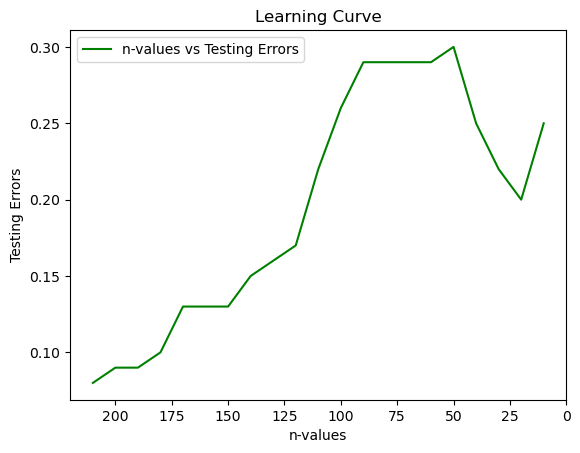

In [66]:
test_set=pd.concat([after_70_set,after_140_set])
index_lookup=np.arange(start=1, stop=197, step=5)

n_list=np.arange(start=10, stop=220, step=10)
k_list=[]
testing_errors=[]

for n in range(10,220,10):
    first_70_set=data[data["class"]==0][:int(n/3)]
    first_140_set=data[data["class"]==1][:n-int((n/3))]
    
    minimum_error=1
    
    train_set=pd.concat([first_70_set,first_140_set])
    X=train_set.iloc[:,:6]
    Y=train_set.iloc[:,6:]

    for k in range(1, n, 5):
        clf = neighbors.KNeighborsClassifier(n_neighbors=k, metric="euclidean")
        clf.fit(X.values, Y["class"])
        Y_pred = clf.predict(test_X.values)
        new_test_error = np.mean(Y_pred != test_Y["class"])
        if new_test_error <= minimum_error:
            minimum_error = new_test_error
            k_optimum = k

    k_list.append(k_optimum)
    testing_errors.append(minimum_error)
    print("test",n,minimum_error)
    
print()
print(k_list)
print()
print(testing_errors)
print()

plt.plot(n_list, testing_errors, 'g', label='n-values vs Testing Errors')
plt.legend(), plt.title('Learning Curve'), plt.xlabel('n-values'), plt.ylabel('Testing Errors'), plt.gca().invert_xaxis()

In [67]:
d = {'n-values':n_list,'Best testing error':testing_errors,'optimal k value':k_list}
pd.DataFrame(data=d)

,n-values,Best testing error,optimal k value
0,10,0.25,1
1,20,0.20,6
2,30,0.22,1
3,40,0.25,11
4,50,0.30,46
5,60,0.29,21
6,70,0.29,31
7,80,0.29,36
8,90,0.29,46
9,100,0.26,6


(d) Replace the Euclidean metric with the following metrics5 and test them. Summarize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1,6,11,...,196}.
i. Minkowski Distance:
A. which becomes Manhattan Distance with p = 1.

In [68]:
testing_errors=[]
minimum_error=1

for k in range(1,197,5):
    clf=neighbors.KNeighborsClassifier(n_neighbors=k,metric="manhattan")
    clf.fit(X,Y['class'])
    
    test_X_np = np.array(test_X)
    class_probabilities = clf.predict_proba(test_X_np)
    Y_pred = np.argmax(class_probabilities, axis=1)
    
    temp=np.mean(Y_pred!=test_Y["class"])
    if temp<=minimum_error:
        minimum_error=temp
        k_optimum=k
    testing_errors.append(np.mean(Y_pred!=test_Y["class"]))
    
print("test",minimum_error,k_optimum)

test 0.11 26


B. with log10(p) ∈ {0.1,0.2,0.3,...,1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?

In [69]:
testing_errors=[]
minimum_error=1

p_optimum=None
for p in np.arange(0.1,1.1,0.1):
    clf=neighbors.KNeighborsClassifier(n_neighbors=k_optimum,p=10**p)
    clf.fit(X,Y["class"])
    
    Y_pred=clf.predict(test_X)
    
    temp=np.mean(Y_pred!=test_Y["class"])
    if temp<=minimum_error:
        minimum_error=temp
        p_optimum=p
        
    testing_errors.append(np.mean(Y_pred!=test_Y["class"]))
    
print("test",minimum_error,k_optimum)

test 0.1 26


C. which becomes Chebyshev Distance with p → ∞

In [70]:
testing_errors=[]
minimum_error=1

for k in range(1,197,5):
    clf=neighbors.KNeighborsClassifier(n_neighbors=k,metric="chebyshev")
    clf.fit(X,Y["class"])
    
    test_X_np = np.array(test_X)
    class_probabilities = clf.predict_proba(test_X_np)
    Y_pred = np.argmax(class_probabilities, axis=1)
    
    temp=np.mean(Y_pred!=test_Y["class"])
    if temp<=minimum_error:
        minimum_error=temp
        k_optimum=k
        
    testing_errors.append(np.mean(Y_pred!=test_Y["class"]))
print("test",minimum_error,k_optimum)

test 0.08 16


ii. Mahalanobis Distance

In [71]:
testing_errors=[]
minimum_error=1
for k in range(1,197,5):
    clf=neighbors.KNeighborsClassifier(n_neighbors=k,metric="mahalanobis",metric_params={'VI': np.linalg.pinv(X.cov())})
    clf.fit(X,Y["class"])
    
    test_X_np = np.array(test_X)
    class_probabilities = clf.predict_proba(test_X_np)
    Y_pred = np.argmax(class_probabilities, axis=1)
    
    temp=np.mean(Y_pred!=test_Y["class"])
    if temp<=minimum_error:
        minimum_error=temp
        k_optimum=k
        
    testing_errors.append(np.mean(Y_pred!=test_Y["class"]))
print("test",minimum_error,k_optimum)

test 0.15 1


(e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1,6,11,16,...,196}.


In [72]:
testing_errors=[]
errors=[]
opt=[]
distance=[]
minimum_error=1
k_optimum=None

for k in range(1,197,5):
    clf=neighbors.KNeighborsClassifier(n_neighbors=k,weights='distance',metric="euclidean",)
    clf.fit(X,Y["class"])
    Y_pred=clf.predict(test_X)
    
    temp=np.mean(Y_pred!=test_Y["class"])
    
    if temp<=minimum_error:
        minimum_error=temp
        k_optimum=k
        
    testing_errors.append(np.mean(Y_pred!=test_Y["class"]))
    
errors.append(minimum_error)
opt.append(k_optimum)
distance.append("Euclidian")
print("test",k_optimum)

test 6


In [73]:
testing_errors=[]
minimum_error=1
k_optimum=None

for k in range(1,197,5):
    clf=neighbors.KNeighborsClassifier(n_neighbors=k,weights='distance',metric="manhattan",)
    clf.fit(X,Y["class"])
    
    Y_pred=clf.predict(test_X)
    
    temp=np.mean(Y_pred!=test_Y["class"])
    if temp<=minimum_error:
        minimum_error=temp
        k_optimum=k
        
    testing_errors.append(np.mean(Y_pred!=test_Y["class"]))
    
print("test",k_optimum)
errors.append(minimum_error)
opt.append(k_optimum)
distance.append("Manhattan")

test 26


In [74]:
testing_errors=[]
minimum_error=1
k_optimum=None

for k in range(1,197,5):
    clf=neighbors.KNeighborsClassifier(n_neighbors=k,weights='distance',metric="chebyshev",)
    clf.fit(X,Y["class"])
    
    Y_pred=clf.predict(test_X)
    
    temp=np.mean(Y_pred!=test_Y["class"])
    if temp<=minimum_error:
        minimum_error=temp
        k_optimum=k
        
    testing_errors.append(np.mean(Y_pred!=test_Y["class"]))
    
print("test",k_optimum)
errors.append(minimum_error)
opt.append(k_optimum)
distance.append("Chebyshev")

test 61


In [75]:
d = {'distance':distance, 'Best test errors':errors}
pd.DataFrame(d)

,distance,Best test errors
0,Euclidian,0.10
1,Manhattan,0.10
2,Chebyshev,0.11
